# Trying to make complex plots

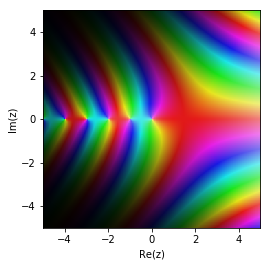

In [6]:
# can make cool colored plots using sympy's complex plot (cplot)
import matplotlib.pyplot as plt
from sympy import mpmath
from mpmath import fp
import sympy
import numpy as np
fp.cplot(fp.gamma, points=100000)

### Separations using python's built in functions + sympy

In [7]:
z = complex(1.040816326530397, 6.628693940038696)
print "Real Component: ", z.real
print "Imaginary Component: ", z.imag

Real Component:  1.04081632653
Imaginary Component:  6.62869394004


In [8]:
print "Conjugate: ", fp.conj(z)
print "Phase: ", fp.arg(z)

Conjugate:  (1.04081632653-6.62869394004j)
Phase:  1.41505114475


In [9]:
print "Polar: ", fp.polar(z)
print "Rect: ", fp.rect(z, fp.pi)

Polar:  (6.709909237558878, 1.4150511447541154)
Rect:  (-1.04081632653-6.62869394004j)


In [10]:
s = [[100000000.0, (1.040816326530397-6.628693940038696e-07j), (-2.2967252729880438e-06+0.2886150127017568j), (-2.2967252729880438e-06+0.2886150127017568j), (-1.040816326530397+6.628693940038696e-07j)], [950000000.0, (1.0408163265306123-7.3448132956773e-09j), (-2.5448479710819952e-08+0.28861501272920004j), (-2.5448479710819952e-08+0.28861501272920004j), (-1.0408163265306123+7.3448132956773e-09j)], [1800000000.0, (1.0408163265306123-2.045893210692509e-09j), (-7.088658318034534e-09+0.2886150127292031j), (-7.088658318034534e-09+0.2886150127292031j), (-1.0408163265306123+2.045893210692509e-09j)]]
x = []
s11 = []; s21 = []; s12 = []; s22 = []
for list in s:
    for i in range(len(list)):
        if i == 0:
            x.append(list[i])
        if i == 1:
            s11.append(list[i])
        if i == 2:
            s12.append(list[i])
        if i == 3:
            s21.append(list[i])
        if i == 4:
            s22.append(list[i])

In [11]:
print x
print s11

[100000000.0, 950000000.0, 1800000000.0]
[(1.040816326530397-6.628693940038696e-07j), (1.0408163265306123-7.3448132956773e-09j), (1.0408163265306123-2.045893210692509e-09j)]


In [12]:
# Real and phase for arrays
def real(l):
    r = []
    for i in l:
        r.append(i.real)
    return r

def phase(l):
    p = []
    for i in l:
        p.append(i.imag)
    return p

print real(s11)
print phase(s11)

[1.040816326530397, 1.0408163265306123, 1.0408163265306123]
[-6.628693940038696e-07, -7.3448132956773e-09, -2.045893210692509e-09]


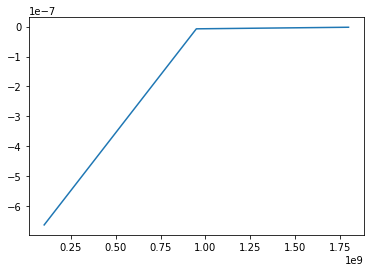

In [13]:
# plt.plot(x, real(s11))
plt.plot(x, phase(s11))
plt.show()

In [14]:
# bring some things over from TPM
def get_s_param_eqns(eqn):
    return np.array([[eqn[0],  eqn[1]], [eqn[2], eqn[3]]])

def graph_s(circuit_type):
    f = np.linspace(3e8, 5e10, 500)
    if circuit_type == 'Open' or circuit_type == 'open':
        z = OpenModel(frequency=f, resistance=50, capacitance=.000047)
    elif circuit_type == 'Short' or circuit_type == 'short':
        z = ShortModel(frequency=f, resistance=50, inductance=.000910)
    else:
        z = TwoPortModel(frequency=f, resistance=0.1)
    count = 0
    s_data = [[], [], [], []]
    for list1 in z.data():
        for i in range(len(list1)):
            if i > 0:
                s_data[i - 1].append(list1[i])
    refl_line = FunctionalModel(parameters=["z0"], variables="z", equation="(z0-z)/(z0+z)")
    tran_line = FunctionalModel(parameters=["z0", "s"], variables="z", equation="(z0/z)**(1/2)*(1-s)")
    eqns = []
    for list1 in s_data:
        if count == 0 or count == 3:
            refl_line.fit_data(f, list1)
            eqns.append(refl_line.equation)
            plt.plot(f, list1, label="s11" if count == 0 else "s22")
            count += 1
        else:
            tran_line.fit_data(f, list1)
            eqns.append(tran_line.equation)
            plt.plot(f, list1, label="s12" if count == 1 else "s21")
            count += 1

    # TODO fix this title because it's not happening
    sympy.init_printing()
    sympy.pprint(sympy.Matrix(get_s_param_eqns(eqns)), use_unicode=False)
    print ' '
    sympy.pprint(sympy.Matrix(get_s_param_eqns(eqns)), use_unicode=False)
    plt.title(circuit_type + ' S Parameters')
    plt.legend()
    plt.show()


In [15]:
Z, z, s = sympy.symbols('Z, z, s')
sympy.init_session()

IPython console for SymPy 1.0 (Python 2.7.13-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [16]:
# define normal eqns
eqn = Matrix([[(Z-z)/(Z+z), sqrt(Z/z)*(1-abs(s))], [sqrt(Z/z)*(1-abs(s)), (z-Z)/(Z+z)]])
eqn

⎡                        ___           ⎤
⎢      Z - z            ╱ Z            ⎥
⎢      ─────           ╱  ─ ⋅(-│s│ + 1)⎥
⎢      Z + z         ╲╱   z            ⎥
⎢                                      ⎥
⎢    ___                               ⎥
⎢   ╱ Z                    -Z + z      ⎥
⎢  ╱  ─ ⋅(-│s│ + 1)        ──────      ⎥
⎣╲╱   z                    Z + z       ⎦

In [17]:
l, f = sympy.symbols('l f')
z_L = 2*l*pi*f

In [18]:
# subs to change to short eqns
for i in range(len(eqn)):
    eqn[i] = eqn[i].subs(Z, 50)
    eqn[i] = eqn[i].subs(z, z_L)
    eqn[i] = eqn[i].subs(s, eqn[0] if i==1 else eqn[3])
eqn

⎡                                   _____                       ⎤
⎢                                  ╱  1   ⎛  │2⋅π⋅f⋅l - 50│    ⎞⎥
⎢                             5⋅  ╱  ─── ⋅⎜- │────────────│ + 1⎟⎥
⎢       -2⋅π⋅f⋅l + 50           ╲╱   f⋅l  ⎝  │2⋅π⋅f⋅l + 50│    ⎠⎥
⎢       ─────────────         ──────────────────────────────────⎥
⎢        2⋅π⋅f⋅l + 50                         √π                ⎥
⎢                                                               ⎥
⎢      _____                                                    ⎥
⎢     ╱  1   ⎛  │Z - z│    ⎞                                    ⎥
⎢5⋅  ╱  ─── ⋅⎜- │─────│ + 1⎟                                    ⎥
⎢  ╲╱   f⋅l  ⎝  │Z + z│    ⎠             2⋅π⋅f⋅l - 50           ⎥
⎢───────────────────────────             ────────────           ⎥
⎣             √π                         2⋅π⋅f⋅l + 50           ⎦

In [19]:
# subs for messier short eqns
l0, l1, l2, f = sympy.symbols('l0 l1 l2 f')
z_l = 2 * sympy.pi * sympy.I * (l0 + l1 * f + l2 * f ** 2)
for i in range(len(eqn)):
    eqn[i] = eqn[i].subs(z, z_l)
eqn

⎡                                                           _____             
⎢                                                          ╱  1   ⎛  │2⋅π⋅f⋅l 
⎢                                                     5⋅  ╱  ─── ⋅⎜- │────────
⎢                   -2⋅π⋅f⋅l + 50                       ╲╱   f⋅l  ⎝  │2⋅π⋅f⋅l 
⎢                   ─────────────                     ────────────────────────
⎢                    2⋅π⋅f⋅l + 50                                     √π      
⎢                                                                             
⎢      _____ ⎛  │          ⎛ 2               ⎞│    ⎞                          
⎢     ╱  1   ⎜  │Z - 2⋅ⅈ⋅π⋅⎝f ⋅l₂ + f⋅l₁ + l₀⎠│    ⎟                          
⎢5⋅  ╱  ─── ⋅⎜- │─────────────────────────────│ + 1⎟                          
⎢  ╲╱   f⋅l  ⎜  │          ⎛ 2               ⎞│    ⎟                          
⎢            ⎝  │Z + 2⋅ⅈ⋅π⋅⎝f ⋅l₂ + f⋅l₁ + l₀⎠│    ⎠             2⋅π⋅f⋅l - 50 
⎢───────────────────────────────────────────────────

In [20]:
# Subplots - totally unrelated (for some reason makes a new window?)
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.title('111')

plt.subplot(212)
plt.title('212')
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()